In [1]:
from quantum_dataset import QM7, QM7b, QM9, Champs, SuperSet
from quantum_learning import Learn, Selector, ChampSelector
from quantum_model import FFNet
from torch.optim import Adam
from torch.nn import MSELoss, L1Loss

RDKit WARNING: [21:36:10] Enabling RDKit 2019.09.3 jupyter extensions


loading QM9 datadic from a pickled copy...
<class 'quantum_dataset.SuperSet'> dataset created...
test loss: 4.412985145431204
y_pred:
tensor([[ 5.4306],
        [ 1.6733],
        [ 5.3702],
        [-1.1373],
        [-0.3065],
        [ 2.8888],
        [ 2.4753],
        [ 4.4991],
        [ 5.2804],
        [ 4.8125]], device='cuda:0')
 y:
tensor([[ 5.1431e+00],
        [ 5.1396e-01],
        [ 6.0498e+00],
        [-9.9477e-01],
        [-4.2489e+00],
        [ 1.6608e-01],
        [ 2.6901e+01],
        [ 7.8457e+00],
        [-2.9326e-01],
        [ 1.4314e-02]], device='cuda:0')


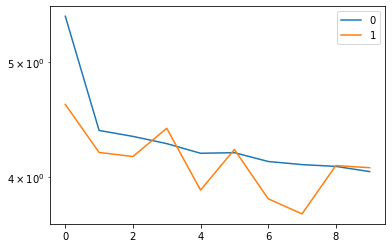

learning time: 0:08:23.652000


In [2]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 29*29+29+15+128+32+64+32+64, 'H': 8192, 'D_out': 1, 'model_name': 'funnel'}
qm9_params = {'n': 133885, 
              'features': ['coulomb','mulliken','A','B','C','mu','alpha','homo',
                           'lumo','gap','r2','zpve','U0','U','H','G','Cv'],  
              'dim': 29, 
              'use_pickle': True}
champs_params = {'n': 4658146, 
                 'features': False,
                 'use_h5': False,  
                 'infer': False}
crit_params = {'reduction': 'sum'}
ds_params = {'PrimaryDS': Champs, 'SecondaryDS': QM9, 'p_params': champs_params, 's_params': qm9_params}
sample_params = {'split': .1, 'subset': .01}

Learn(Dataset=SuperSet, Model=FFNet, Sampler=ChampSelector, Optimizer=Adam, Criterion=L1Loss,
      batch_size=32, epochs=10, model_params=model_params, ds_params=ds_params, 
      sample_params=sample_params, opt_params=opt_params, crit_params=crit_params, 
      save_model=False, load_model=False)